# Introduction 

The purpose of machine learning model is to perform good on unseen date (called test set) by learning from the seen data (called the train set). The model performing too good on the seen data might not be able to do good on the unseen data. The reason is overfitting. Similar to overfitting there is another concept called the underfitting, which means the model is not performing good on both seen and unseen data. The regularization is a way to controll overfitting and underfitting. 

First we start with loading the data and visualizing them. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns;

from scipy.io import loadmat
import scipy.optimize as opt

In [2]:
data = loadmat('Data/ex5data1.mat')
X = data['X']
y = data['y']

X_test = data['Xtest']
y_test = data['ytest']

X_val = data['Xval']
y_val = data['yval']

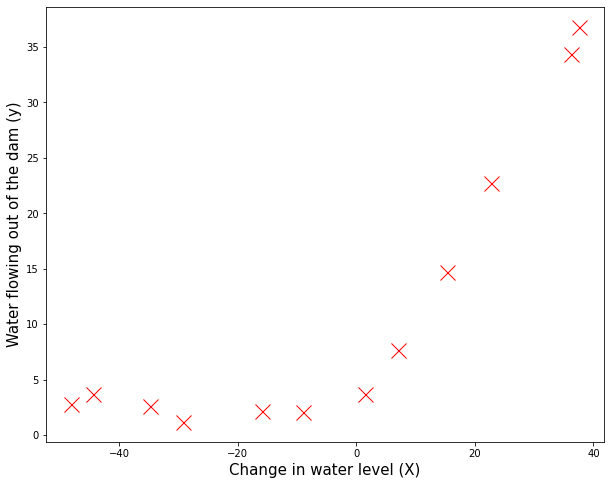

In [3]:
plt.figure(figsize= (10, 8))
plt.plot(X, y, 'rx', markersize = 15)
plt.xlabel('Change in water level (X)', size = 15)
plt.ylabel('Water flowing out of the dam (y)', size = 15)
plt.show()

In [4]:
lmbd = 0

In [5]:
X_b = np.hstack((np.ones(X.shape), X)) 
X_test_b = np.hstack((np.ones(X_test.shape), X_test))
X_val_b = np.hstack((np.ones(X_val.shape), X_val))

theta = np.array([1, 1])

# Cost function 

The line of best fit for y given X takes the following form:

$$ y = \theta_0 + \theta_1 X $$
Where, for unknown y, it is usually called a hypothesis.

$$ y_{pred} = h (X, \theta) $$
For the training set the difference of the prediction by the hypothesis h and y is called the residue error. The sum of square of residue of each data point in training set is called cost function. Which loos like this:

$$ J(X, y, \theta) = \frac{1}{2m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right)^2 + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2 $$

In calculus, gradient is the direction of the maximum increase of a function. So, negative of the gradient is direction of maximum decrease of the function. By gradient we mean the following two functions:

$$ \frac{\partial J}{\partial \theta_0} \quad ... ... \quad \frac{\partial J}{\partial \theta_p}   $$
Hence the following recursion give eventually leads to the local minima (for well defined cost function there is only global minima):

$$ \theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j} $$
If we substitute the expression of the cost function in the above relations we arrive at the following pair of expressions.

$$ \theta_j = \theta_j - \frac{\alpha}{m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right) X^{(i)}_j \quad \quad \text{for} \quad j = 0 $$

$$ \theta_j =  \theta_j - \frac{\alpha}{m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right) X^{(i)}_j + \alpha \frac{\lambda}{m} \theta_j  \quad \quad \text{for} \quad j \geq 1 $$

In [6]:
def hypothesis(theta, X):
    '''
    This function gives the hypothesis for the linear regression.
    theta is a vectorized fit parameter. 
    X is a vectorized feature vector. 
    '''
    return np.dot(X, theta)

In [7]:
def cost_function(theta, X, y, lmbd):
    '''
    This is the cost function for the simple linear regression function. 
    X is a vectorized fit parameters.
    X is a feature matrix. 
    y is a response vector. 
    '''
    m = len(y)
    theta_p = np.delete(theta, 0)
    reg = lmbd/(2 * m) * np.dot(theta_p, theta_p)
    
    return 1/(2 * m) * np.sum((hypothesis(theta, X) - y.flatten()) ** 2) + reg

In [8]:
cost_function(theta, X_b, y, 1)

303.9931922202643

In [9]:
cost_function(theta, X_b[:1], y[:1], 1)

146.2106922645887

In [10]:
def gradient(theta, X, y, lmbd):
    '''
    This function defines the gradient of a (p + 1)-dimensional hypersurface spanned 
    by p number of features and a bias. 
    theta is vectorized fit parameters. 
    X is a feature matrix.
    y is a response vector. 
    '''
    m = len(y)
    return 1/m * np.dot(hypothesis(theta, X) - y.flatten(), X) + lmbd/m * np.append(0, theta[1:])

In [11]:
gradient(theta, X_b, y, 1) 

array([-15.30301567, 598.25074417])

# Fitting the model 

We fit the linear model in this section. The data is non-linear. This is already evident from the plot. We also see that the linear fit does no good job representing all the data points as expected. This is an example of underfit.

In [12]:
min_at = opt.fmin_tnc(func = cost_function, x0 = theta, fprime = gradient, 
                      args = (X_b, y, lmbd))[0]

print('(Theta_0, Theta_1, Theta_2) : \t\t', min_at)
print('The minimum value of cost function: \t', cost_function(min_at, X_b, y, lmbd))

(Theta_0, Theta_1, Theta_2) : 		 [13.08790394  0.36777923]
The minimum value of cost function: 	 22.373906495108997


In [13]:
print(cost_function(min_at, X_val_b, y_val, 1))
print(cost_function(min_at, X_test_b, y_test, 1))

29.437038116045834
32.50896884190788


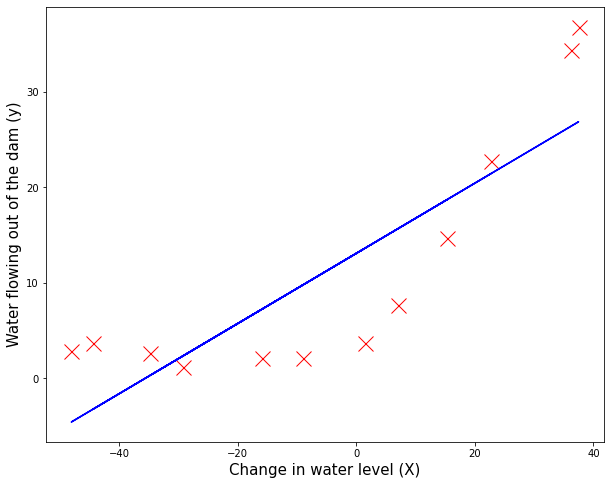

In [14]:
plt.figure(figsize= (10, 8))
plt.plot(X, y, 'rx', markersize = 15)
plt.xlabel('Change in water level (X)', size = 15)
plt.ylabel('Water flowing out of the dam (y)', size = 15)
plt.plot(X, hypothesis(min_at, X_b), 'b')
plt.show()

In [15]:
cost_function(min_at, X_b, y, 0)

22.373906495108997

In [16]:
error_train = []
error_test = []
for i in range(len(y) + 1):
    min_at = opt.fmin_tnc(func = cost_function, x0 = theta, fprime = gradient, 
                          args = (X_b[:i + 1], y[:i + 1], lmbd))[0]
    
    error_train_i = cost_function(min_at, X_b[:i + 1], y[:i + 1], lmbd)
    error_test_i = cost_function(min_at, X_val_b, y_val, lmbd)
    
    error_train.append(error_train_i)
    error_test.append(error_test_i)

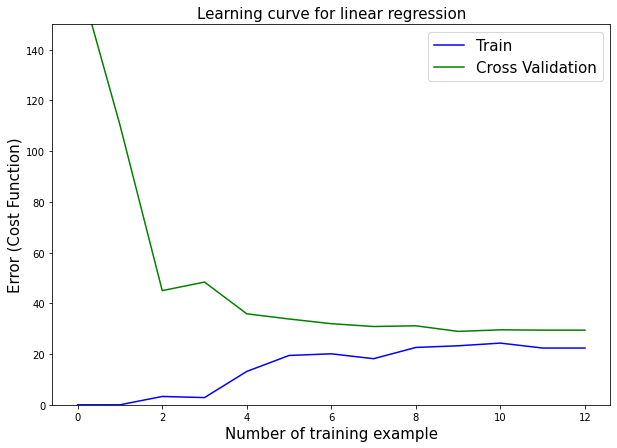

In [17]:
plt.figure(figsize = (10, 7))
plt.plot(error_train, 'b')
plt.plot(error_test, 'g')
plt.ylim(0, 150)
plt.xlabel('Number of training example', size = 15)
plt.ylabel('Error (Cost Function)', size = 15)
plt.title('Learning curve for linear regression', size = 15)
plt.legend(['Train', 'Cross Validation'], fontsize = 15)
plt.show()

# Polynomial regression

The curve of best fit looks like this: 

$$ y = \theta_0 + \theta_1 X_1 + \theta_2 X^2 + ... ... + \theta_n X^n $$

In [18]:
def poly_feature(X, power):
    X_powers = X
    for i in range(2, power + 1):
        X_powers = np.hstack((X_powers, X ** i))
    return X_powers

In [19]:
def feature_norm(X_):
    return (X_ - X.mean(axis = 0))/X.std(axis = 0)

In [20]:
lmbd = 0.05
poly_order = 8

In [21]:
X_norm = feature_norm(X)
X_poly = np.hstack((np.ones(X.shape), poly_feature(X_norm, poly_order)))

theta_new = np.ones(X_poly.shape[1])

In [22]:
min_at = opt.fmin_tnc(func = cost_function, x0 = theta_new, 
                      fprime = gradient, args = (X_poly, y, lmbd))[0]

print('(Theta_0, Theta_1, Theta_2) : \t\t', min_at)
print('The minimum value of cost function: \t', cost_function(min_at, X_poly, y, lmbd))

(Theta_0, Theta_1, Theta_2) : 		 [ 2.96943017  6.70951069  8.36870301  5.33398074  2.85805174 -1.7917548
 -1.51780408  0.12415123  0.01901079]
The minimum value of cost function: 	 0.5477907231053732


In [23]:
x_grid = np.linspace(-60, 50, 100)[:, np.newaxis]

x_grid_norm = feature_norm(x_grid)
x_grid_poly = np.hstack((np.ones(x_grid.shape), poly_feature(x_grid_norm, poly_order)))

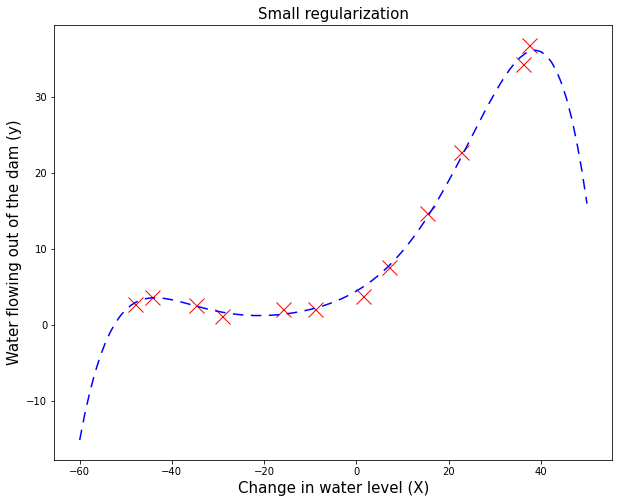

In [24]:
plt.figure(figsize= (10, 8))
plt.plot(X, y, 'rx', markersize = 15)
plt.xlabel('Change in water level (X)', size = 15)
plt.ylabel('Water flowing out of the dam (y)', size = 15)
plt.plot(x_grid, hypothesis(min_at, x_grid_poly), 'b', dashes=[7, 5])
plt.title('Small regularization', size = 15)
plt.show()

In [25]:
X_val_norm = feature_norm(X_val)
X_val_poly = np.hstack((np.ones(X_val.shape), poly_feature(X_val_norm, poly_order)))

X_test_norm = feature_norm(X_test)
X_test_poly = np.hstack((np.ones(X_test.shape), poly_feature(X_test_norm, poly_order)))

In [26]:
error_train = []
error_test = []
for i in range(len(y) + 1):
    min_at = opt.fmin_tnc(func = cost_function, x0 = theta_new, 
                          fprime = gradient, args = (X_poly[:i + 1], y[:i + 1], lmbd))[0]
    
    error_train_i = cost_function(min_at, X_poly[:i + 1], y[:i + 1], lmbd)
    error_test_i = cost_function(min_at, X_val_poly, y_val, lmbd)
    
    error_train.append(error_train_i)
    error_test.append(error_test_i)

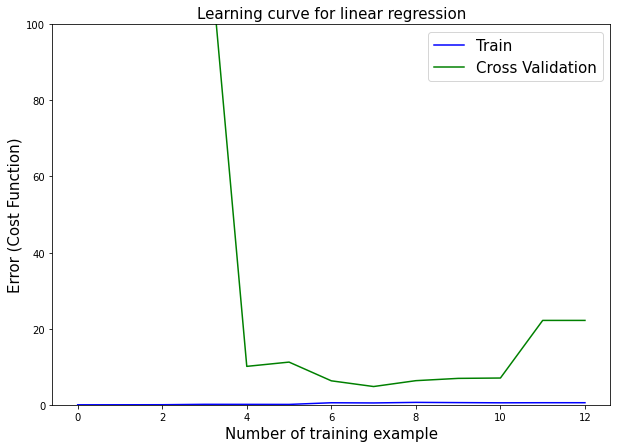

In [27]:
plt.figure(figsize = (10, 7))
plt.plot(error_train, 'b')
plt.plot(error_test, 'g')
plt.ylim(0, 100)
plt.xlabel('Number of training example', size = 15)
plt.ylabel('Error (Cost Function)', size = 15)
plt.title('Learning curve for linear regression', size = 15)
plt.legend(['Train', 'Cross Validation'], fontsize = 15)
plt.show()

# Tuning $\lambda$

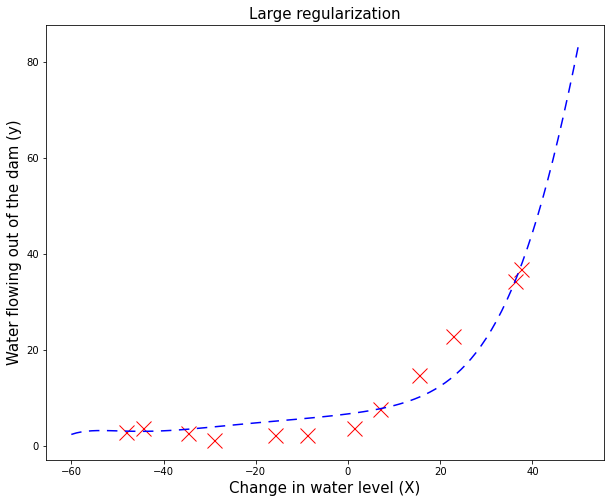

In [28]:
lmbd = 5
poly_order = 8

theta_new = np.ones(X_poly.shape[1])

X_norm = feature_norm(X)
X_poly = np.hstack((np.ones(X.shape), poly_feature(X_norm, poly_order)))

min_at = opt.fmin_tnc(func = cost_function, x0 = theta_new, 
                      fprime = gradient, args = (X_poly, y, lmbd))[0]

x_grid = np.linspace(-60, 50, 100)[:, np.newaxis]

x_grid_norm = feature_norm(x_grid)
x_grid_poly = np.hstack((np.ones(x_grid.shape), poly_feature(x_grid_norm, poly_order)))

x_grid = np.linspace(-60, 50, 100)[:, np.newaxis]

x_grid_norm = feature_norm(x_grid)
x_grid_poly = np.hstack((np.ones(x_grid.shape), poly_feature(x_grid_norm, poly_order)))

plt.figure(figsize= (10, 8))
plt.plot(X, y, 'rx', markersize = 15)
plt.xlabel('Change in water level (X)', size = 15)
plt.ylabel('Water flowing out of the dam (y)', size = 15)
plt.plot(x_grid, hypothesis(min_at, x_grid_poly), 'b', dashes=[7, 5])
plt.title('Large regularization', size = 15)
plt.show()

In [29]:
def error(lmbd, X_test, y_test): 
    poly_order = 8
    X_norm = feature_norm(X)
    X_poly = np.hstack((np.ones(X.shape), poly_feature(X_norm, poly_order)))
    theta_new = np.ones(X_poly.shape[1])
        
    X_test_norm = feature_norm(X_test)
    X_test_poly = np.hstack((np.ones(X_test.shape), poly_feature(X_test_norm, poly_order)))
    
    min_at = opt.fmin_tnc(func = cost_function, x0 = theta_new, 
                          fprime = gradient, args = (X_poly, y, lmbd))[0]
    return cost_function(min_at, X_test_poly, y_test, lmbd)

In [30]:
lmbd_list = np.linspace(1, 8, 10)
    
error_list_train = []
for i in lmbd_list:
    error_list_train.append(error(i, X, y))

error_list_cv = []
for i in lmbd_list:
    error_list_cv.append(error(i, X_val, y_val))

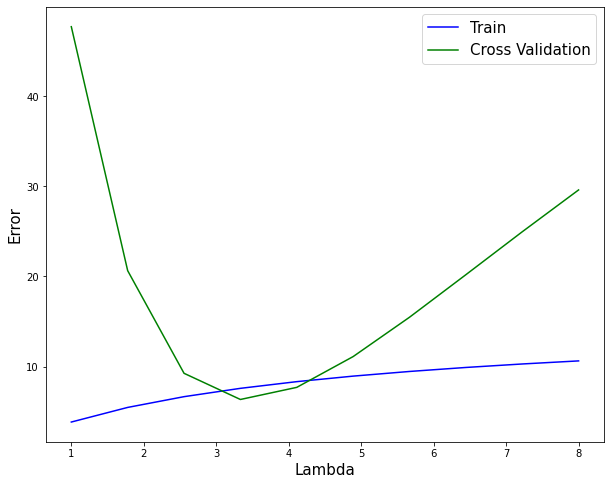

In [31]:
plt.figure(figsize = (10, 8))
plt.plot(lmbd_list, error_list_train, 'b')
plt.plot(lmbd_list, error_list_cv, 'g')
plt.xlabel('Lambda', size = 15)
plt.ylabel('Error', size = 15)
plt.legend(['Train', 'Cross Validation'], fontsize = 15)
plt.show()

# Accuracy 

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
print('MSE in training set: \t\t\t', 
      mean_squared_error(hypothesis(min_at, X_poly),y.flatten()))
print('R2 score in training set: \t\t', 
      r2_score(hypothesis(min_at, X_poly),y.flatten()))
print('')

print('MSE in cross validation set: \t\t', 
      mean_squared_error(hypothesis(min_at, X_val_poly),y_val.flatten()))
print('R2 score in cross validation set: \t', 
      r2_score(hypothesis(min_at, X_val_poly),y_val.flatten()))
print('')

print('MSE in test set: \t\t\t', 
      mean_squared_error(hypothesis(min_at, X_test_poly),y_test.flatten()))
print('R2 score in test set: \t\t\t', 
      r2_score(hypothesis(min_at, X_test_poly),y_test.flatten()))

MSE in training set: 			 11.015028016702267
R2 score in training set: 		 0.9159102929473347

MSE in cross validation set: 		 19.37387505021872
R2 score in cross validation set: 	 0.9150622391754372

MSE in test set: 			 8.001751268959932
R2 score in test set: 			 0.9622604141339868
